In [2]:
#%pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import sqlite3
import warnings


In [4]:
# Ignorar las advertencias de DeprecatedFeatureWarning
#warnings.filterwarnings("ignore", category=sntwitter.DeprecatedFeatureWarning)

# Definir la cuenta de Twitter mencionada y el rango de fechas
account = "@TheBridge_Tech"
start_date = "2023-02-13"
end_date = "2023-05-22"

# Construir la consulta de búsqueda
query = f"{account} since:{start_date} until:{end_date}"

# Obtener los tweets utilizando snscrape
tweets = []
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    tweet_id = tweet.id
    text = tweet.rawContent
    date = tweet.date.strftime('%Y-%m-%d %H:%M:%S')
    author_id = tweet.user.id
    author_name = tweet.user.displayname
    author_username = tweet.user.username
    retweets = tweet.retweetCount
    replies = tweet.replyCount
    likes = tweet.likeCount
    quotes = tweet.quoteCount
    

    tweets.append([tweet_id, text, date, author_id, author_name, author_username, retweets, replies, likes, quotes])

    # Romper el bucle si se alcanza el límite de tweets deseados
    if len(tweets) >= 20000:
        break

# Crear un DataFrame a partir de la lista de tweets
columns = ["ID", "Text", "Date", "Author ID", "Author Name", "Author Username", "Retweets", "Replies", "Likes", "Quotes"]
tweets_df = pd.DataFrame(tweets, columns=columns)

# Imprimir el DataFrame
print(tweets_df)

Stopping after 20 empty pages


                      ID                                               Text  \
0    1659514560200470559  Ayer visitamos a los alumnos de @TheBridge_Tec...   
1    1659136842854219776  ¿Qué hacían nuestros alumni antes del #bootcam...   
2    1658825158994403329  #MLMonitoring and #Observability, mar, 23 may ...   
3    1658791064306688002  Nos colamos en el campus de #Bilbao para descu...   
4    1658430987368386566  Así es el #bootcamp de #UXUIProductDesign que ...   
..                   ...                                                ...   
136  1625828554691805187  ¿Los colores tienen género?¿podemos hacer una ...   
137  1625825721862987777                       @BitcoinTuesday_ ¡Un placer!   
138  1625813763751305216  Gracias a nuestros amigos @TheBridge_Tech por ...   
139  1625165984414695426  ¡Nos vamos al WorkinLan Workshop en Bilbao jun...   
140  1625126689150738438  Les compartimos un mini resumen del 1º encuent...   

                    Date            Author ID      

In [5]:
#Explorar el dataset
# Estadísticos
tweets_df.describe()
# Tipos de los datos
tweets_df.dtypes
# Tipos de los datos y missings
tweets_df.info()
# Columnas del dataset
tweets_df.columns
# dimensiones del dataset
print("Filas:", tweets_df.shape[0])
print("Columnas:", tweets_df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               141 non-null    int64 
 1   Text             141 non-null    object
 2   Date             141 non-null    object
 3   Author ID        141 non-null    int64 
 4   Author Name      141 non-null    object
 5   Author Username  141 non-null    object
 6   Retweets         141 non-null    int64 
 7   Replies          141 non-null    int64 
 8   Likes            141 non-null    int64 
 9   Quotes           141 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 11.1+ KB
Filas: 141
Columnas: 10


In [6]:
tweets_df.describe()

,ID,Author ID,Retweets,Replies,Likes,Quotes
count,1.410000e+02,1.410000e+02,141.000000,141.000000,141.000000,141.000000
mean,1.641126e+18,7.538820e+17,1.489362,0.340426,3.553191,0.156028
std,9.203233e+15,5.742028e+17,2.679598,0.674323,4.893765,0.524863
min,1.625127e+18,7.154412e+06,0.000000,0.000000,0.000000,0.000000
25%,1.634157e+18,1.003872e+09,0.000000,0.000000,1.000000,0.000000
50%,1.638825e+18,9.365398e+17,1.000000,0.000000,2.000000,0.000000
75%,1.648338e+18,1.162694e+18,2.000000,1.000000,4.000000,0.000000
max,1.659515e+18,1.613114e+18,25.000000,4.000000,39.000000,4.000000


In [7]:
# Obtener el usuario con la mayor cantidad de tweets
user_with_most_tweets = tweets_df['Author Username'].value_counts().idxmax()
# Imprimir el resultado
print("El usuario con la mayor cantidad de tweets es:", user_with_most_tweets)


El usuario con la mayor cantidad de tweets es: TheBridge_Tech


In [8]:
# Top5 de usuarios
top_5_users = tweets_df['Author Username'].value_counts().nlargest(5)
print("Los 10 usuarios con la mayor cantidad de tweets:")
print(top_5_users)


Los 10 usuarios con la mayor cantidad de tweets:
TheBridge_Tech     45
DatabeerSVQ        17
nodosenlared        9
ESOLIUPO            6
decentralized_b     5
Name: Author Username, dtype: int64


In [9]:
#top5 de tweets, reply y likes
top_retweet_users = tweets_df.groupby('Author Username')['Retweets'].sum().nlargest(5).index.tolist()
top_retweet_df = tweets_df[tweets_df['Author Username'].isin(top_retweet_users)]

top_like_users = tweets_df.groupby('Author Username')['Likes'].sum().nlargest(5).index.tolist()
top_like_df = tweets_df[tweets_df['Author Username'].isin(top_like_users)]

top_reply_users = tweets_df.groupby('Author Username')['Replies'].sum().nlargest(5).index.tolist()
top_reply_df = tweets_df[tweets_df['Author Username'].isin(top_reply_users)]

top_users = pd.concat([top_retweet_df, top_like_df, top_reply_df])
top_users



,ID,Text,Date,Author ID,Author Name,Author Username,Retweets,Replies,Likes,Quotes
1,1659136842854219776,¿Qué hacían nuestros alumni antes del #bootcam...,2023-05-18 10:00:23,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0
2,1658825158994403329,"#MLMonitoring and #Observability, mar, 23 may ...",2023-05-17 13:21:52,41545659,Mario Lopez de Avila,nodosenlared,1,0,3,0
3,1658791064306688002,Nos colamos en el campus de #Bilbao para descu...,2023-05-17 11:06:23,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0
4,1658430987368386566,Así es el #bootcamp de #UXUIProductDesign que ...,2023-05-16 11:15:34,1162694149956603904,The Bridge,TheBridge_Tech,1,0,3,0
5,1658211678901641230,"Y finalmente, como nos decían en casa, es de b...",2023-05-15 20:44:06,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
131,1627677085232779265,Seguro que has oído hablar del Cloud Computing...,2023-02-20 14:30:32,1162694149956603904,The Bridge,TheBridge_Tech,1,1,2,0
135,1625882688023416833,¿Te animas a crear un videojuego con programac...,2023-02-15 15:40:14,1162694149956603904,The Bridge,TheBridge_Tech,3,0,2,0
136,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,1162694149956603904,The Bridge,TheBridge_Tech,2,1,2,0
137,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,1162694149956603904,The Bridge,TheBridge_Tech,0,0,2,0


In [10]:
# Calcular el puntaje de relevancia combinando las métricas
tweets_df['Relevance'] = tweets_df['Retweets'] + tweets_df['Replies'] + tweets_df['Likes'] + tweets_df['Quotes']

# Obtener el índice del tweet con el puntaje más alto
max_relevance_index = tweets_df['Relevance'].idxmax()

# Obtener el texto del tweet de mayor relevancia
top_tweet_text = tweets_df.loc[max_relevance_index, 'Text']

# Imprimir el tweet de mayor relevancia
print("Tweet de mayor relevancia:")
print(top_tweet_text)


Tweet de mayor relevancia:
Para reactivarse!!!
Tenemos Meetup este martes 11 de abril a las 19:00 en @TheBridge_Tech

@dev7ba nos hablará sobre la mempool!!
Charla para todo el mundo, sepas o no sobre #Bitcoin 

@GaboHBeaumont @kilrau @libertariadora @olya_borderless
https://t.co/bHzpDduIRo

Se agradece RT


In [11]:
# Convertir la columna de fecha a tipo datetime
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])

# Extraer el mes de la columna de fecha
tweets_df['Month'] = tweets_df['Date'].dt.month

# Agrupar por mes y contar el número de tweets, retweets y replies
monthly_counts = tweets_df.groupby('Month').agg({'Text': 'count', 'Retweets': 'sum', 'Replies': 'sum'})

# Obtener el mes con el mayor número de tweets
month_with_max_tweets = monthly_counts['Text'].idxmax()

# Obtener el mes con el mayor número de retweets
month_with_max_retweets = monthly_counts['Retweets'].idxmax()

# Obtener el mes con el mayor número de replies
month_with_max_replies = monthly_counts['Replies'].idxmax()

# Imprimir los resultados
print("Mes con el mayor número de tweets:", month_with_max_tweets)
print("Mes con el mayor número de retweets:", month_with_max_retweets)
print("Mes con el mayor número de replies:", month_with_max_replies)


Mes con el mayor número de tweets: 3
Mes con el mayor número de retweets: 3
Mes con el mayor número de replies: 4


In [12]:
# Convert the 'Text' column to string data type
tweets_df['Text'] = tweets_df['Text'].astype(str)

# Find the tweet with the highest number of tweets
tweet_with_max_tweets = tweets_df.loc[tweets_df['Text'].str.len().idxmax(), 'Text']

# Find the tweet with the highest number of retweets
tweet_with_max_retweets = tweets_df.loc[tweets_df['Retweets'].idxmax(), 'Text']

# Find the tweet with the highest number of replies
tweet_with_max_replies = tweets_df.loc[tweets_df['Replies'].idxmax(), 'Text']

# Print the results
print("Mes con el mayor número de tweets:", month_with_max_tweets)
print("Tweet con el mayor número de tweets:", tweet_with_max_tweets)
print()
print("Mes con el mayor número de retweets:", month_with_max_retweets)
print("Tweet con el mayor número de retweets:", tweet_with_max_retweets)
print()
print("Mes con el mayor número de replies:", month_with_max_replies)
print("Tweet con el mayor número de replies:", tweet_with_max_replies)


Mes con el mayor número de tweets: 3
Tweet con el mayor número de tweets: @MISTERINCGNITA1 @PauMugarra @SingularSolving @TheBridge_Tech Tal vez la próxima vez! 🙃
(y lo de dar gracias es fácil: para mí, quien las recibe obtiene un beneficio, pero quien las da obtiene dos: reconoce lo bueno recibido y además ser agradecido está correlacionado con la felicidad; en cierta manera, lo hago más por mí q por el otro 🤣)

Mes con el mayor número de retweets: 3
Tweet con el mayor número de retweets: Para reactivarse!!!
Tenemos Meetup este martes 11 de abril a las 19:00 en @TheBridge_Tech

@dev7ba nos hablará sobre la mempool!!
Charla para todo el mundo, sepas o no sobre #Bitcoin 

@GaboHBeaumont @kilrau @libertariadora @olya_borderless
https://t.co/bHzpDduIRo

Se agradece RT

Mes con el mayor número de replies: 4
Tweet con el mayor número de replies: Untagged Day - El evento de analítica digital al que a mí me gustaría asistir.

27 de abril  a partir de las 18:30.
En @TheBridge_Tech Madrid.
Entra

In [13]:
#!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [14]:
import re

In [15]:
import re
import pandas as pd

# Definir función para limpiar los tweets
def clean_tweet(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    
    # Eliminar caracteres especiales como @ y #
    text = re.sub(r'[@#]', '', text)
    
    # Eliminar URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Eliminar caracteres no alfanuméricos
    text = re.sub(r'\W', ' ', text)
    
    # Eliminar espacios adicionales
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Crear un nuevo DataFrame 'text_clean' con la columna 'Text_cleaned'
text_clean = pd.DataFrame()
text_clean['Text_cleaned'] = tweets_df['Text'].apply(clean_tweet)

# Imprimir el DataFrame 'text_clean'
print(text_clean)



                                          Text_cleaned
0    ayer visitamos a los alumnos de thebridge_tech...
1    qué hacían nuestros alumni antes del bootcamp ...
2    mlmonitoring and observability mar 23 may 2023...
3    nos colamos en el campus de bilbao para descub...
4    así es el bootcamp de uxuiproductdesign que im...
..                                                 ...
136  los colores tienen género podemos hacer una ap...
137                          bitcointuesday_ un placer
138  gracias a nuestros amigos thebridge_tech por a...
139  nos vamos al workinlan workshop en bilbao junt...
140  les compartimos un mini resumen del 1º encuent...

[141 rows x 1 columns]


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Obtener una lista de todas las palabras en los tweets
all_words = ' '.join(text_clean['Text_cleaned']).split()

# Obtener las stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar las palabras, excluyendo las stopwords y los caracteres no alfanuméricos
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Contar la frecuencia de las palabras
word_counts = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = word_counts.most_common(10)

# Imprimir las palabras más frecuentes
print("Palabras más frecuentes:")
for word, count in top_words:
    print(f"{word}: {count}")

Palabras más frecuentes:
sngular: 27
gracias: 20
digital: 20
entradas: 19
bootcamp: 17
h: 17
sevilla: 16
madrid: 16
jueves: 16
opensistemas: 16


[nltk_data] Downloading package punkt to /home/arrate/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arrate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Seleccionar las columnas de interés
metrics = ['Retweets', 'Replies', 'Likes', 'Quotes']
metrics_df = tweets_df[metrics]

# Calcular la matriz de correlación
correlation_matrix = metrics_df.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
          Retweets   Replies     Likes    Quotes
Retweets  1.000000  0.369654  0.822408  0.630953
Replies   0.369654  1.000000  0.542096  0.252486
Likes     0.822408  0.542096  1.000000  0.572389
Quotes    0.630953  0.252486  0.572389  1.000000


          Retweets   Replies     Likes    Quotes
Retweets  1.000000  0.369654  0.822408  0.630953
Replies   0.369654  1.000000  0.542096  0.252486
Likes     0.822408  0.542096  1.000000  0.572389
Quotes    0.630953  0.252486  0.572389  1.000000


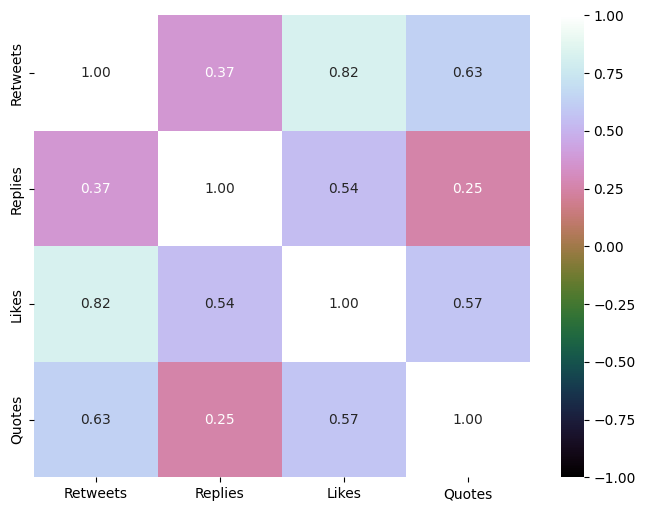

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación
corr_matrix = metrics_df.corr()

# Ordenamos las variables por su correlación con la columna "affairs" de forma ascendente
#corr_affairs = corr_matrix["affairs"].sort_values(ascending=True)

# Creamos el heatmap con la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, 
            cmap='cubehelix', 
            annot=True, 
            fmt='.2f', 
            vmin=-1, 
            vmax=1, 
            center=0)

# Mostramos las variables ordenadas por su correlación con la columna "affairs"
print(corr_matrix)


In [ ]:
import sqlite3

# Conectarse a la base de datos
conn = sqlite3.connect('tweets.db')
c = conn.cursor()

# Crear la tabla "tweets" si no existe
c.execute('''
    CREATE TABLE IF NOT EXISTS tweets (
        id INTEGER PRIMARY KEY,
        text TEXT,
        date TEXT,
        author_id INTEGER,
        retweets INTEGER,
        replies INTEGER,
        likes INTEGER,
        quotes INTEGER
    )
''')

# Crear la tabla "usuarios" si no existe
c.execute('''
    CREATE TABLE IF NOT EXISTS usuarios (
        id INTEGER PRIMARY KEY,
        name TEXT,
        username TEXT
    )
''')

# Insertar los tweets en la tabla "tweets"
for tweet in tweets:
    tweet_id, text, date, author_id, _, _, retweets, replies, likes, quotes = tweet
    c.execute('''
        INSERT INTO tweets (id, text, date, author_id, retweets, replies, likes, quotes)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', (tweet_id, text, date, author_id, retweets, replies, likes, quotes))

# Insertar los usuarios en la tabla "usuarios"
for tweet in tweets:
    _, _, _, author_id, author_name, author_username, _, _, _, _ = tweet
    c.execute('''
        INSERT OR IGNORE INTO usuarios (id, name, username)
        VALUES (?, ?, ?)
    ''', (author_id, author_name, author_username))

# Guardar los cambios y cerrar la conexión con la base de datos
conn.commit()
conn.close()

In [27]:
import pickle

# Cargar el modelo preentrenado desde el archivo pickle
with open('./Entregas/model/sentiment_model', 'rb') as file:
    sentiment_model = pickle.load(file)


/home/arrate/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Us

In [28]:
# Obtener los textos de los tweets
tweet_texts = tweets_df['Text'].tolist()

# Obtener las predicciones de sentimiento utilizando el modelo
predictions = sentiment_model.predict(tweet_texts)


In [29]:
predictions

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1])

In [32]:
import pandas as pd

# Obtener los textos de los tweets y las predicciones
tweet_texts = tweets_df['Text'].tolist()
predictions = sentiment_model.predict(tweet_texts)

# Crear un DataFrame con los textos de los tweets y las predicciones
data = {'Tweet': tweet_texts, 'Sentiment': predictions}
df = pd.DataFrame(data)

df

,Tweet,Sentiment
0,Ayer visitamos a los alumnos de @TheBridge_Tec...,1
1,¿Qué hacían nuestros alumni antes del #bootcam...,0
2,"#MLMonitoring and #Observability, mar, 23 may ...",1
3,Nos colamos en el campus de #Bilbao para descu...,0
4,Así es el #bootcamp de #UXUIProductDesign que ...,0
...,...,...
136,¿Los colores tienen género?¿podemos hacer una ...,1
137,@BitcoinTuesday_ ¡Un placer!,0
138,Gracias a nuestros amigos @TheBridge_Tech por ...,0
139,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,0
